# PA0: Python Primer [100 Marks]

<center>
    <img src="./assets/python.png">
</center>

Credits: This notebook is inspired by a [Python tutorial](http://cs231n.github.io/python-numpy-tutorial/) by [Justin Johnson](https://web.eecs.umich.edu/~justincj/) for [CS231n](http://cs231n.github.io/). 

Feel free to refer to the original course for more practice.

## Introduction

We will use the Python programming language for all assignments in this course. Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

We expect that many of you will have some experience with Python and `numpy`; for the rest of you, this section will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.

Some of the things to be covered:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes

* `numpy`: Arrays, Array indexing, Datatypes, Array math, Broadcasting

* `matplotlib`: Plotting, Subplots, Images

* `IPython`: Creating notebooks, Typical workflows

### Instructions

- Follow along with the notebook, filling out the necessary code where instructed.

- <span style="color: red;">Read the Submission Instructions and Plagiarism Policy in the attached PDF.</span>

- <span style="color: red;">Make sure to run all cells for credit.</span>

- <span style="color: red;">Do not remove any pre-written code.</span> We will be using the `print` statements to grade your assignment.

- <span style="color: red;">You must attempt all parts.</span> Do not assume that because something is for 0 marks, you can leave it - it will definitely be used in later parts.

## Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. 

As an example, here is an implementation of the classic `quicksort` algorithm in Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))
# Prints "[1, 1, 2, 3, 6, 8, 10]"

[1, 1, 2, 3, 6, 8, 10]


### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [2]:
x = 3
print(type(x)) # Prints "<class 'int'>"
print(x)       # Prints "3"

<class 'int'>
3


In [3]:
print(x + 1)   # Addition; prints "4"
print(x - 1)   # Subtraction; prints "2"
print(x * 2)   # Multiplication; prints "6"
print(x ** 2)  # Exponentiation; prints "9"

4
2
6
9


In [4]:
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"

4
8


In [5]:
y = 2.5
print(type(y)) # Prints "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment, or decrement operators, i.e. `x++` and `x--` respectively.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-complex).

#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words (`and`, `or`) rather than symbols (`&&`, `||`, etc.):

In [6]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print(t and f) # Logical AND; prints "False"
print(t or f)  # Logical OR; prints "True"
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"

<class 'bool'>
False
True
False
True


#### Strings

Python has great support for strings:

In [7]:
hello = 'hello'    # String literals can use single quotes
world = "world"    # or double quotes; it does not matter.
print(hello)       # Prints "hello"
print(len(hello))  # String length; prints "5"
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"

hello
5
hello world
hello world 12


String objects have a bunch of useful methods; for example:

In [8]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


You can find a list of all string methods in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#string-methods).

### Containers

Python includes several built-in container types: lists (`list`), dictionaries (`dict`), sets (`set`), and tuples (`tuple`).

#### Lists

A `list` is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [9]:
xs = [3, 1, 2]    # Create a list
print(xs, xs[2])  # Prints "[3, 1, 2] 2"
print(xs[-1])     # Negative indices count from the end of the list; prints "2"
xs[2] = 'foo'     # Lists can contain elements of different types
print(xs)         # Prints "[3, 1, 'foo']"
xs.append('bar')  # Add a new element to the end of the list
print(xs)         # Prints "[3, 1, 'foo', 'bar']"
x = xs.pop()      # Remove and return the last element of the list
print(x, xs)      # Prints "bar [3, 1, 'foo']"

[3, 1, 2] 2
2
[3, 1, 'foo']
[3, 1, 'foo', 'bar']
bar [3, 1, 'foo']


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists).

##### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [10]:
nums = list(range(5))     # range is a built-in function that creates a list of integers
print(nums)               # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])          # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])           # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])           # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])          # Slice indices can be negative; prints "[0, 1, 2, 3]"
nums[2:4] = [8, 9]        # Assign a new sublist to a slice
print(nums)               # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### Loops

You can loop over the elements of a list like this:

In [11]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)
# Prints "cat", "dog", "monkey", each on its own line.

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [12]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: cat", "#2: dog", "#3: monkey", each on its own line

#1: cat
#2: dog
#3: monkey


##### List Comprehensions

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [13]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

In [14]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [15]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)  # Prints "[0, 4, 16]"

[0, 4, 16]


#### Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [16]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d)
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"
d['fish'] = 'wet'     # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"
# print(d['monkey'])  # KeyError: 'monkey' not a key of d
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"
del d['fish']         # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

{'cat': 'cute', 'dog': 'furry'}
cute
True
wet
N/A
wet
N/A


You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#dict).

##### Loops 

It is easy to iterate over the keys in a `dict`:

In [152]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    print(animal)
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

person
A person has 2 legs
cat
A cat has 4 legs
spider
A spider has 8 legs


If you want access to keys and their corresponding values, use the `items` method:

In [18]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A %s has %d legs' % (animal, legs))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


##### Dictionary Comprehensions 

These are similar to list comprehensions, but allow you to easily construct `dict`s. For example:

In [19]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)  # Prints "{0: 0, 2: 4, 4: 16}"

{0: 0, 2: 4, 4: 16}


#### Sets

A `set` is an unordered collection of distinct elements. As a simple example, consider the following:

In [20]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"
animals.add('fish')       # Add an element to a set
print('fish' in animals)  # Prints "True"
print(len(animals))       # Number of elements in a set; prints "3"
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"
animals.remove('cat')     # Remove an element from a set
print(len(animals))       # Prints "2"

True
False
True
3
3
2


As usual, everything you want to know about sets can be found in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#set).

##### Loops 

Iterating over a `set` has the same syntax as iterating over a `list`; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [21]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: fish", "#2: cat", "#3: dog"

#1: cat
#2: dog
#3: fish


##### Set Comprehensions

Like lists and dicts, we can easily construct sets using set comprehensions:

In [22]:
from math import sqrt
nums = {int(sqrt(x)) for x in range(30)}
print(nums)  # Prints "{0, 1, 2, 3, 4, 5}"

{0, 1, 2, 3, 4, 5}


#### Tuples

A `tuple` is an (immutable) ordered list of values. It is in many ways similar to a `list`; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. 

Here is a trivial example:

In [23]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
print(d)
t = (5, 6)        # Create a tuple
print(type(t))    # Prints "<class 'tuple'>"
print(d[t])       # Prints "5"
print(d[(1, 2)])  # Prints "1"

{(0, 1): 0, (1, 2): 1, (2, 3): 2, (3, 4): 3, (4, 5): 4, (5, 6): 5, (6, 7): 6, (7, 8): 7, (8, 9): 8, (9, 10): 9}
<class 'tuple'>
5
1


The [documentation](https://docs.python.org/3.7/tutorial/datastructures.html#tuples-and-sequences) has more information about tuples.

### Functions

Python functions are defined using the `def` keyword. For example:

In [24]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))
# Prints "negative", "zero", "positive"

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [25]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s!' % name.upper())
    else:
        print('Hello, %s' % name)

hello('Bob') # Prints "Hello, Bob"
hello('Fred', loud=True)  # Prints "HELLO, FRED!"

Hello, Bob
HELLO, FRED!


There is a lot more information about Python functions in the [documentation](https://docs.python.org/3.7/tutorial/controlflow.html#defining-functions).

#### Lambda Functions
These are anonymous functions in Python which take any number of arguments but only one expression. Their syntax generally follows:

`lambda arguments : expression`. 

They are one line function and expression are representing the body of a normal function.

In [26]:
l = lambda a : a+5  ## lambda function 'l' is created which is taking 'a' as an argument and expression adds 5 to the value of argument a
print(l(2))  ## passing 2 as value of 'a' argument of lambda function 'l' . This will return 7(7 = 2+5) as output.

l1 = lambda a,b,c : a * b * c ## lambda function 'l1' is created which is taking 3 arguments (a,b,c) and return the result by multiplying them all.
print(l1(10,20,30))  ## passing 10,20,30 as arguments 'a', 'b', 'c' respectively to 'l1' function. Print result 6000 (6000 = 10*20*30)

7
6000


We can use Lambda function anonymously inside other functions. Example is shown below

In [27]:
def func(n):  ## define a function that takes argument 'n' and returns a lambda function after multiplying some unknown argument 'a' with given 'n'
  return lambda a: a*n

l2 = func(4)  ## passing 4 as value of 'n' in 'func' function. This will return lambda function 'l2' where n is assigned a value of 4.
print(l2(6)) ## This will call lambda function 'l2' where 6 is given as value for argument 'a'. Print 24(24 = 6*4) as result 

24


### Classes

The syntax for defining classes in Python is straightforward:

In [28]:
class Greeter(object):

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print('HELLO, %s!' % self.name.upper())
        else:
            print('Hello, %s' % self.name)

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


You can read a lot more about Python classes in the [documentation](https://docs.python.org/3.7/tutorial/classes.html).

## `numpy`

[NumPy](https://numpy.org/) is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

To use NumPy, we first need to import the `numpy` package:

In [29]:
import numpy as np

### Arrays

A `numpy` array (`np.ndarray`) is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [30]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a)
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
[1 2 3]
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


`numpy` also provides many functions to create arrays:

In [31]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.59830088 0.12552942]
 [0.41747785 0.42407914]]


You can read about other methods of array creation in the [documentation](https://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation).

### Array indexing

`numpy` offers several ways to index into arrays.

#### Slicing 

Similar to Python lists, `numpy` arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [32]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array:

In [33]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


#### Integer Array Indexing

When you index into `numpy` arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [34]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 1], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 4]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [35]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


#### Boolean Array Indexing 

Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [107]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the [documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [37]:
x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

int64
float64
int64


You can read all about `numpy` datatypes in the [documentation](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array Math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [38]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


We use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. 

`dot` is available both as a function in the numpy module and as an instance method of array objects:

In [39]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


`numpy` provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [40]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by `numpy` in the [documentation](https://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` *attribute* of an array object:

In [41]:
x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


Numpy provides many more functions for manipulating arrays; you can see the full list in the [documentation](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).

### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [42]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector `v` to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. 

We could implement this approach like so:

In [43]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


`numpy` broadcasting allows us to perform this computation without actually creating multiple copies of `v`. 

Consider this version, using broadcasting:

In [44]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if `v` actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
The arrays can be broadcast together if they are compatible in all dimensions.
After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension
If this explanation does not make sense, try reading the explanation from the [documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](https://numpy.org/devdocs/user/theory.broadcasting.html).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [45]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](https://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## `matplotlib`

[Matplotlib](https://matplotlib.org/) is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [46]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [47]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is `plot`, which allows you to plot 2D data. Here is a simple example:

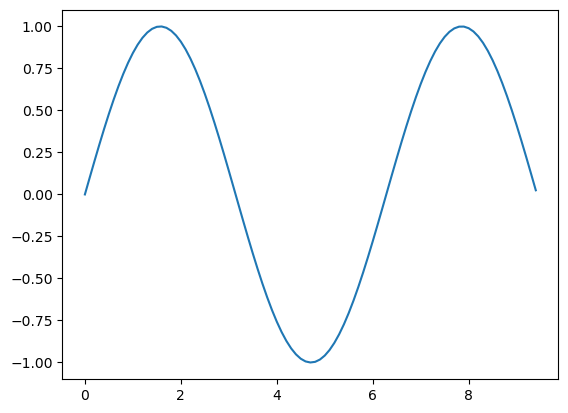

In [48]:
# Compute the x and y coordinates for points on a sine curve

x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

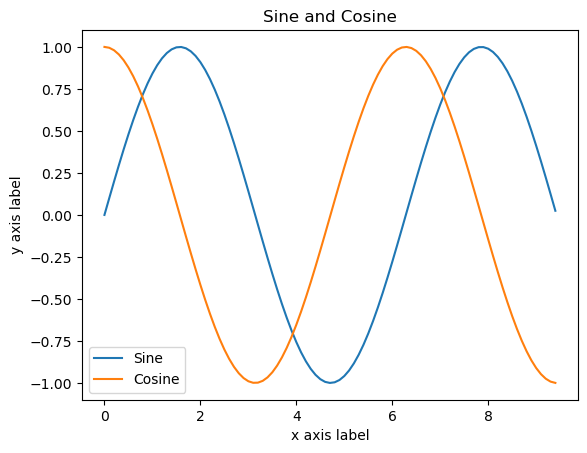

In [49]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

You can read much more about the `plot` function in the [documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

### Subplots 

You can plot different things in the same figure using the `subplot` function. Here is an example:

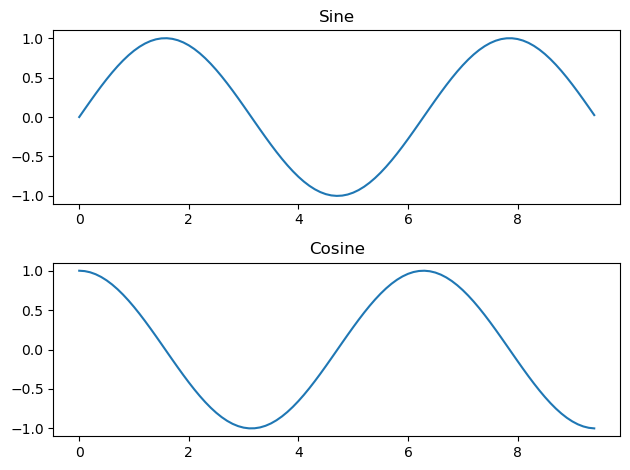

In [50]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.tight_layout()
plt.show()

You can read much more about the `subplot` function in the [documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## Regex

A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing). Regex may involve metacharaters/Sequences/Sets that form a search pattern.

1. `^` matches the start of the string
2. `*` matches zero or more number of repitions of preceding Regular expression.
3.  `$` matches the end of string with given sequence.
4.  `\d`	Returns a match where the string contains digits (numbers from 0-9)
5.  `\s` returns a match where the string contains a white space character
6.  `[a-n]` returns a match for any lower case character, alphabetically between a and n.
7.  `[0-9]` returns a match for any digit between 0 and 9

Complete list of sequences can be found [here](https://docs.python.org/3/library/re.html)

To use Regex, we first need to import the package.

In [51]:
import re

This package offers variety of different functions which can be used to find patterns in the string.

### `findall()`

This method is used to print a list of all the matches of given string. If no matches are found then an empty list is returned. Look at the following examples:

In [52]:
txt = "Its been an energetic day today."
x = re.findall("day", txt) ## find all instances of string 'day' in txt string
print(x) ## print all occurences if exist

['day', 'day']


In [53]:
txt = "from"
x = "We are going there tomorrow."
x = re.findall("is", txt) ## find all instances of string 'is' in txt string
print(x) ## print empty string since no such instances exist

[]


### `split()`

The `split` function is used to return a list where there the string has been split at each match. In example below, regular expression `\s` splits the string at each white space character.

In [54]:
txt = "We are going to a park."
x = re.split("\s", txt)
print(x)


['We', 'are', 'going', 'to', 'a', 'park.']


We can control the maximum number of splits by providing `maxsplit` parameter. In example below, only first 2 splits occurences will be found and returned as list.

In [55]:
txt = "We are going to a park."
x = re.split("\s", txt, 2)
print(x)

['We', 'are', 'going to a park.']


### `sub()`

The `sub()` function replaces the matches with the text of your choice. For example, [0-9] regex will replace digits with given string.

In [56]:
txt = "Some digits like 100 and 490 are replaced."
x = re.sub("[0-9]", "-", txt)
print(x) 

Some digits like --- and --- are replaced.


### `search()`

Returns a `Match` object if there is a match anywhere in the string.
Using this method, the regular expression in given example looks for any words that starts with an upper case "S":

In [57]:
txt = "The rain in Spain."
x = re.search(r"\bS\w+", txt)
print(x) ## prints match object
print(x.group()) ## prints a tuple containing all the subgroups of the match,

<re.Match object; span=(12, 17), match='Spain'>
Spain


## File I/O

Python has several functions for creating, reading, updating, and deleting files.

### Reading Files

In this course, you will mostly be dealing with CSV (or comma-separated values) files. These files are used to store tabular data in plain text. Each line of the file is a data record. Each record consists of one or more fields, separated by commas.

The easiest way to read a CSV file is by using the `pandas` module, which has a very handy `read_csv` function.

In [58]:
import pandas as pd

# Read in a csv using a URL
data = pd.read_csv('https://raw.githubusercontent.com/daniaahmad13/Dataset/main/StudentsPerformance.csv')

# Display the first 5 rows
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Writing to a File

Writing to files is also very simple. There are some some nuances and a few different ways to do it, so we encourage you to read the [documentation](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files) to learn more.

In [59]:
# Open the file in the append mode as the write mode overwrites the first line
file1 = open("myfile.txt","a")
file1.write("Today \n")
file1.close()

## Scikit-Learn

Scikit-Learn, commonly known as `sklearn`, is a free Machine Learning library for the Python programming language. 

It offers numerous classification, regression, and clustering algorithms, including K-Means, Linear Regression, Logistic Regression, Naive Bayes and State Vector Machines, etc. Moreover, it supports tasks such as feature extraction, feature selection, model evaluation, model selection, parameter tuning, etc. 

More information regarding `sklearn`, including its implementation, can be found [here](https://scikit-learn.org/stable/).


# Questions

Solve some of the questions below to get more clear understanding of Python basics:

### Q1.

Write the code to determine the parity of a given number.

In [60]:
### Code here

def parity(x):
    if not x % 2:
        print("Even")
    
    else:
        print("Odd")
      

x = 0
parity(x)


Even


### Q2.

For a given list of strings, check if the length of the string is even or odd. Print `even` or `odd` accordingly.

In [61]:
x = ['alphabets', 'numerics', 'data types', '123', 'wild' ,'abc', 'chars']


def is_even(n):
    return not n % 2
    
### Code here
for s in x:
    if not (len(s) % 2):
        print(f"'{s}' is Even")
    else:
        print(f"'{s}' is Odd")



'alphabets' is Odd
'numerics' is Even
'data types' is Even
'123' is Odd
'wild' is Even
'abc' is Odd
'chars' is Odd


### Q3.

Write a code to reverse the string `hello` using indexing.

In [62]:
### Code here
hello = 'hello'
new = ''
for i in range(len(hello) - 1, -1, -1):
    new += hello[i]

print(new)

olleh


### Q4.

For numbers in range `0` to `100`, return a list of those that are multiple of `2` but not `5` using list comprehension.

In [68]:
### Code here
nums = [x for x in range(0, 101)]
ans = [num for num in nums if (num % 2 == 0 and num % 5 != 0)]
print(ans)

[2, 4, 6, 8, 12, 14, 16, 18, 22, 24, 26, 28, 32, 34, 36, 38, 42, 44, 46, 48, 52, 54, 56, 58, 62, 64, 66, 68, 72, 74, 76, 78, 82, 84, 86, 88, 92, 94, 96, 98]


### Q5.

Generate two numpy arrays x and y of 5 random integers between `[1,10]`, compute a new array where each element is the square of sum of corresponding entries in x and y. Use broadcasting in this question.

For example: 

`x = [1,2,3,4,5]` and `y = [6,7,8,9,10]`

Result: `[49, 81, 121, 169, 225]`

In [95]:
import numpy as np
x = np.random.randint(1, 11, 5)
y = np.random.randint(1, 11, 5)

ans = (x + y)**2 
print(ans)
### Code here


[121  25 100  36 169]


### Q6.

Given two dictionaries of `ids` and `maths_scores`, write a function to return a dictionary where keys are students ids and values are a list containing the corresponding student's name and their score.

In [99]:
from collections import defaultdict
ids = {4: 'John', 2: 'Robert', 1: 'Alice', 3: 'William', 5: 'Edward'} ## keys are student ids and values are student names
maths_scores = {2: 89, 1: 78.8, 3: 100, 5: 67.5, 4: 45}  ## keys are student ids and values are student scores

### Code here
def scores():
    ans  = {}
    for i in range(1, 6):
        ans[i] = [ids[i], maths_scores[i]]
    return ans

a = scores()
print(a)

{1: ['Alice', 78.8], 2: ['Robert', 89], 3: ['William', 100], 4: ['John', 45], 5: ['Edward', 67.5]}


### Q7.

Given a `numpy` array `x`, write a function to find all negative elements and replace them with their squares. Use boolean indexing.

In [109]:
x = np.array([[4,-5,7,-10],[-110,4,-8,34],[14,5,-17,-20]])

### Code here
bool_idx = (x < 0)

x[bool_idx] = (x[bool_idx]) ** 2

print(x)

[[    4    25     7   100]
 [12100     4    64    34]
 [   14     5   289   400]]


### Q8.

Write a function which takes that `numpy` 1-D array as input and returns the following:

1.   Maximum value in the array
2.   Standard Deviation
3.   Sum of all the elements in the array

In [117]:
x = np.array([[4,-5,7,-10],[-110,4,-8,34],[14,5,-17,-20]])
print(x)

m = np.max(x)
print(m)

sd = np.std(x)
print(sd)

s = np.sum(x)
print(s)



[[   4   -5    7  -10]
 [-110    4   -8   34]
 [  14    5  -17  -20]]
34
33.62662635472075
-102


### Q9.

Write a Python function that accepts a string and calculates the number of upper case letters and lower case letters.

In [132]:
str = "Hello Mr. Rogers, how are you this fine Tuesday?"

### Code here


def upper_lower(word):

    upper = lower = 0
    for s in str:
        if s.isupper():
            upper += 1
        elif s.islower():
            lower += 1

    return (upper, lower)

up, low = upper_lower(str)
print(f"Upper : {up}\nLower : {low}")


Upper : 4
Lower : 33


### Q10.

Write a function that prints the integers from 1 to 100. But for multiples of three, print `Fizz` instead of the number, and for the multiples of five print `Buzz`. For numbers which are multiples of both three and five print `FizzBuzz`.

In [134]:
### Code here
for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)



1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


### Q11.

Write a function, `calculateSum(l,k)` which will take a list, `l` and a number `k` as input and return two numbers from `l` that add up to `k`.

In [147]:
l = [1, 21, 3, 14, 5, 60, 7, 6]
k = 81

### Code here
def calculateSum(l, k):
    for i in range(len(l) - 1):
        for j in range(i + 1, len(l)):
            if l[i] + l[j] == k:
                print(l[i], l[j])
            
calculateSum(l, k)


21 60


### Q12.

Write a function, `find_students`  that receives the `students` dictionary and an `address`, and returns a `list` with names in sorted order of all students whose address matches the address in the argument.

In [160]:
def find_students(address, students):
	names = []
	### Code here
	for student in students:
		dic = students[student]
		if dic["address"] == address:
			names.append(student)

	names.sort()
	return names


students = {
      "Ali": {"age": 6, "address": "Lahore"},
	  "Eesha": {"age": 21, "address": "Lahore"},
      "Ahmad": {"age": 15, "address": "Lahore"},
      
}

print(find_students("Lahore", students))

['Ahmad', 'Ali', 'Eesha']


### Q13.

Edit the following iterator class to return all the positive even numbers from `1` to `n`.

You can read about iterators [here](https://realpython.com/python-iterators-iterables/).

In [ ]:
class EvenNumbers:
  ### Code here

  def __init__(self, n):
    pass

  def __iter__(self):
    return self

  def next(self):
    pass
    
myrange = EvenNumbers(10)
print (EvenNumbers.next())

### Q14.

Using keys and indexing, grab the `hello` from the given dictionaries.

In [172]:
d = {'simple_key':'hello'}

hello = d['simple_key']
print(hello)


d = {'k1':{'k2':'hello'}}

temp = d['k1']
hello = temp['k2']
print(hello)

d = {'k1':[{'nest_key':['this is deep',['hello']]}]}

temp = d['k1']
print(temp)
temp = temp[0]
print(temp)
temp = temp['nest_key']
print(temp[1][0])

### Code here


hello
hello
[{'nest_key': ['this is deep', ['hello']]}]
{'nest_key': ['this is deep', ['hello']]}
hello


### Q15.

Write a python Class that accepts a tuple, has two instance variables (`a` and `b`), setter and getter methods with the following methods:

1. `add()`

2. `sub()`

3. `mul()`

4. `div()`

5. `pow()`

In [174]:
### Code here

class TupleOps:
    def __init__(self, vals):
        self.a = vals[0]
        self.b = vals[1]

    def add(self):
        return self.a + self.b
    
    def sub(self):
        return self.a - self.b
    
    def mul(self):
        return self.a * self.b
    def div(self):
        if self.b != 0:
            return self.a / self.b
    def pow(self):
        return self.a ** self.b

### Q16. 

For given array x of floating point numbers. Plot out the following functions with the specified properties. Make a different subplot for each listed number.

---

1. `y1` = $x^{2}$, `y2` = $x^{3}$

* X and Y axis labels

* Legend in top left corner

* Give an appropriate title

* `y1` line with `green` color

* `y2` line with `orange` color

---

2. `y` = $\sin^{2}(x) \cdot \sin^{3}(x)$

* X and Y axis labels

* Legend in top center

* Give an appropriate title

* line `fontsize` 15

---

3. `y` = $\cos^{2}(x)$

* X and Y axis labels

* Legend in bottom right corner

* Give an appropriate title

* `y` graph with green disconnected green circles

---

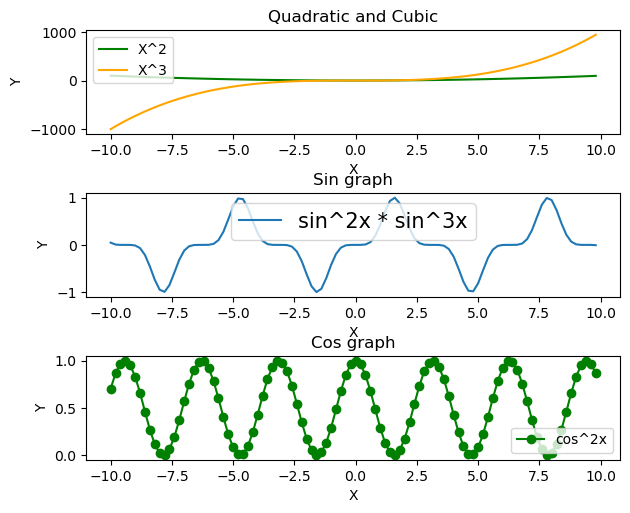

In [206]:
x = np.arange(-10,10, 0.2)
y1 = x ** 2
y2 = x ** 3

plt.subplot(3, 1, 1)

plt.plot(x, y1, color="green", label = "X^2")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y2, color="orange", label = "X^3")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Quadratic and Cubic")
plt.legend(loc='upper left')
plt.tight_layout()


plt.subplot(3, 1, 2)
y = (np.sin(x))** 2 * (np.sin(x))** 3
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, label = "sin^2x * sin^3x")
plt.legend(loc="upper center", fontsize=15)
plt.tight_layout()
plt.title("Sin graph")


plt.subplot(3, 1, 3)
y = np.cos(x) ** 2
plt.plot(x, y, "go-", label = "cos^2x")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Cos graph")
plt.legend(loc = "lower right")


plt.show()

### Q17.

Read the data given in the file `StudentsPerformance.csv` and display it, using `.head()`. Then create the following plots:

1. A barplot for the `gender` column (showing frequencies of the unique values).

2. A histogram for the `math score` column with 40 bins.

3. A histogram for the `reading score` column 75 bins.

4. A histogram for the `writing score` column with 50 bins.

5. A pie chart for the `race/ethnicity` column.

For each one, be sure to include an appropriate title, and axis labels (where applicable).

Text(0.5, 1.0, 'Race Distribution')

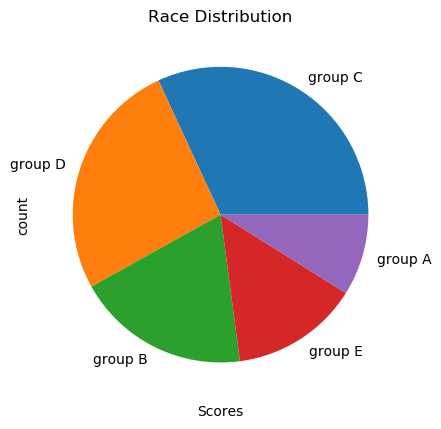

In [240]:
### Code here
data = pd.read_csv("./StudentsPerformance.csv")
data.head()

gender = data["gender"]

# gender.value_counts().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")

math = data["math score"]
# math.value_counts().plot.hist(bins=40)
plt.xlabel("Scores")
plt.ylabel("Count")
plt.title("Math Scores")

read = data["reading score"]
# read.value_counts().plot.hist(bins=75)
plt.xlabel("Scores")
plt.ylabel("Count")
plt.title("Reading Scores")

write = data["writing score"]
plt.xlabel("Scores")
plt.ylabel("Count")
plt.title("Writing Scores")
# write.value_counts().plot.hist(bins=50)


race = data["race/ethnicity"]
race.value_counts().plot.pie()
plt.title("Race Distribution")

# Fin.